## Dataset Information

This dataset is collected from HDFC bank customer.It contains a single customer's one year complete transaction. Starting from 2019 april to 2020 march.It includes total debit and credit transaction made by the customer throughout the year.With help of this dataset we do deep level analysis of user transactions.And check whether dataset follows timeseries or not.

## Importing required librareis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

### Loading the datasets

In [2]:
data1=pd.read_csv('april2019-july2019.csv')
data2=pd.read_csv('aug2019-nov2019.csv')
data3=pd.read_csv('dec2019-march2020.csv')

In [3]:
### printing top 5 samples
data1.head()

,Date,Narration,Chq./Ref.No.,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
0,02-04-2019,UPI-6111974179-SABARIKTS2@OKHDFCBANK-PAY-90920...,90929027268,02-04-2019,NaN,900.00,20369.03
1,02-04-2019,POS 416021XXXXXX3832 SAPPDA VANGA POS DEBIT,7781,02-04-2019,36.0,NaN,20333.03
2,02-04-2019,POS 416021XXXXXX3832 KANNAN CATERING POS DEBIT,61552,02-04-2019,15.0,NaN,20318.03
3,02-04-2019,NWD-416021XXXXXX3832-IOBD5356-CHENNAI,9.09221E+11,02-04-2019,500.0,NaN,19818.03
4,03-04-2019,REV POS 416021******3832 0310 DISCOUNT O,0,03-04-2019,NaN,0.75,19818.78


In [4]:
### printing top 5 samples
data2.head()

,Date,Narration,Chq./Ref.No.,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
0,01-08-2019,POS 416021XXXXXX0914 SAPPDA POS DEBIT,42678,01-08-2019,41.0,NaN,24731.88
1,01-08-2019,UPI-AJIN SABABATHY KAVI-9994155506@YBL-UTIB00...,9.21317E+11,01-08-2019,1000.0,NaN,23731.88
2,01-08-2019,POS 416021XXXXXX0914 SAPPDA POS DEBIT,43026,01-08-2019,36.0,NaN,23695.88
3,01-08-2019,UPI-ANANDHAN E-ANANDH130596@OKICICI-ICIC000322...,9.21321E+11,01-08-2019,1000.0,NaN,22695.88
4,02-08-2019,POS 416021XXXXXX0914 SAPPDA POS DEBIT,43515,02-08-2019,36.0,NaN,22659.88


In [5]:
### printing top 5 samples
data3.head()

,Date,Narration,Chq./Ref.No.,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
0,01-12-2019,UPI-KADAR BASHA A-Q87974607@YBL-PUNB0792300-93...,9.3351E+11,01-12-2019,625.0,NaN,23209.69
1,01-12-2019,UPI-MUTHUAKSHMI VEGETABL-Q88513705@YBL-TMBL000...,9.3351E+11,01-12-2019,385.0,NaN,22824.69
2,01-12-2019,UPI-SABARITHULASIRAM G-7845433075@YBL-HDFC0001...,9.3352E+11,01-12-2019,274.0,NaN,22550.69
3,02-12-2019,UPI-GIREESH VARMAA E R-GIREESHVARMAA-1@OKHDFCB...,93360237360,02-12-2019,500.0,NaN,22050.69
4,02-12-2019,UPI-SUDHEESH V-Q92737643@YBL-CNRB0000000-93363...,93369113204,02-12-2019,10.0,NaN,22040.69


## EDA

### Column Names

In [6]:
pd.Series(data1.columns)

0               Date
1          Narration
2       Chq./Ref.No.
3           Value Dt
4    Withdrawal Amt.
5       Deposit Amt.
6    Closing Balance
dtype: object

### Datatypes

In [7]:
data1.dtypes

Date                object
Narration           object
Chq./Ref.No.        object
Value Dt            object
Withdrawal Amt.    float64
Deposit Amt.       float64
Closing Balance    float64
dtype: object

### Shape of Data

In [8]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

(376, 7)
(373, 7)
(492, 7)


### Merging all data in single dataframe

In [9]:
## concatenating the all dataframe into single dataframe
df=pd.concat([data1,data2,data3],axis=0,join='outer')

In [10]:
### printing top 5 samples
df.head()

,Date,Narration,Chq./Ref.No.,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
0,02-04-2019,UPI-6111974179-SABARIKTS2@OKHDFCBANK-PAY-90920...,90929027268,02-04-2019,NaN,900.00,20369.03
1,02-04-2019,POS 416021XXXXXX3832 SAPPDA VANGA POS DEBIT,7781,02-04-2019,36.0,NaN,20333.03
2,02-04-2019,POS 416021XXXXXX3832 KANNAN CATERING POS DEBIT,61552,02-04-2019,15.0,NaN,20318.03
3,02-04-2019,NWD-416021XXXXXX3832-IOBD5356-CHENNAI,9.09221E+11,02-04-2019,500.0,NaN,19818.03
4,03-04-2019,REV POS 416021******3832 0310 DISCOUNT O,0,03-04-2019,NaN,0.75,19818.78


In [11]:
### printing bottom 5 samples
df.tail()

,Date,Narration,Chq./Ref.No.,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
487,01-04-2020,CREDIT INTEREST CAPITALISED,0,31-03-2020,NaN,57.0,30751.94
488,01-04-2020,UPI-ESAKKIMUTHU M-Q55982980@YBL-KVBL0001284-00...,9210785703,01-04-2020,373.0,NaN,30378.94
489,01-04-2020,UPI-KUPPUSAMY P-Q73041214@YBL-SBIN0007850-009...,9210867618,01-04-2020,60.0,NaN,30318.94
490,01-04-2020,UPI-KUPPUSAMY P-Q73041214@YBL-SBIN0007850-009...,9210871967,01-04-2020,60.0,NaN,30258.94
491,01-04-2020,UPI-GOKUL PRASHANTH RAVI-GOKULPRASHANTHR12-1@O...,9211009029,01-04-2020,NaN,1840.0,32098.94


In [12]:
## Exporting into csv for future reference
#df.to_csv('ref.csv') 

In [13]:
### shape of merged dataframe
df.shape

(1241, 7)

### Checking for any missing values

In [14]:
df.isna().sum()

Date                 0
Narration            0
Chq./Ref.No.         0
Value Dt             0
Withdrawal Amt.    274
Deposit Amt.       967
Closing Balance      0
dtype: int64

### Replacing missing values with zeros

In [15]:
df.fillna(0,inplace=True)

In [16]:
### Rechecking for any missing values
df.isna().sum()

Date               0
Narration          0
Chq./Ref.No.       0
Value Dt           0
Withdrawal Amt.    0
Deposit Amt.       0
Closing Balance    0
dtype: int64

### Checking for unique values in dataframe

In [17]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print()
    print('----------------')

Date
310

----------------
Narration
936

----------------
Chq./Ref.No.
1110

----------------
Value Dt
308

----------------
Withdrawal Amt.
255

----------------
Deposit Amt.
108

----------------
Closing Balance
1145

----------------


In [18]:
### Duplicate value count in columns
print(df[df['Chq./Ref.No.'].duplicated()].count())

Date               131
Narration          131
Chq./Ref.No.       131
Value Dt           131
Withdrawal Amt.    131
Deposit Amt.       131
Closing Balance    131
dtype: int64


In [19]:
### Duplicate values in columns
df[df['Chq./Ref.No.'].duplicated()]

,Date,Narration,Chq./Ref.No.,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
13,06-04-2019,POS 416021XXXXXX3832 MUTHU TIFFEN CEN POS DEBIT,9.09618E+11,06-04-2019,120.0,0.00,4775.78
17,08-04-2019,EMI 66188604 CHQ S661886040011 041966188604,0,08-04-2019,3539.0,0.00,550.78
33,12-04-2019,UPI-GIREESH VARMAA E R-GIREESHVARMAA-1@OKHDFCB...,9.10221E+11,12-04-2019,0.0,200.00,350.78
34,12-04-2019,UPI-JEFFREY RAJ GUEZOU C-JEFFREYRAJCJ@OKHDFCBA...,9.10221E+11,12-04-2019,0.0,50.00,400.78
37,13-04-2019,POS 416021XXXXXX3832 JM ENTERPRISE POS DEBIT,9.10313E+11,13-04-2019,200.0,0.00,262.78
...,...,...,...,...,...,...,...
404,11-03-2020,POS REF 416021******0914-03/11 ..AG AGEN,0,11-03-2020,0.0,3.94,2414.30
425,16-03-2020,POS 416021XXXXXX0914 CURRYS N CRUNCH,1601,16-03-2020,-115.0,0.00,11861.30
473,26-03-2020,POS REF 416021******0914-03/25 HPCL COMC,0,26-03-2020,0.0,3.94,6217.74
486,31-03-2020,CRV POS-416021******0914-0101-SARATH FUE,0,31-03-2020,0.0,3.20,30694.94


### Dropping non significant columns

In [20]:
df.drop('Chq./Ref.No.',axis=1,inplace=True)
df.drop('Narration',axis=1,inplace=True)

In [21]:
### Considering only till 2020-march , so deleting all above data
df.tail(10)

,Date,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
482,30-03-2020,30-03-2020,91.0,0.0,5300.74
483,30-03-2020,30-03-2020,80.0,0.0,5220.74
484,31-03-2020,31-03-2020,0.0,25503.0,30723.74
485,31-03-2020,31-03-2020,32.0,0.0,30691.74
486,31-03-2020,31-03-2020,0.0,3.2,30694.94
487,01-04-2020,31-03-2020,0.0,57.0,30751.94
488,01-04-2020,01-04-2020,373.0,0.0,30378.94
489,01-04-2020,01-04-2020,60.0,0.0,30318.94
490,01-04-2020,01-04-2020,60.0,0.0,30258.94
491,01-04-2020,01-04-2020,0.0,1840.0,32098.94


In [22]:
df.drop([487,488,489,490,491],inplace=True)

In [23]:
## Printing bottom 5 samples
df.tail()

,Date,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
482,30-03-2020,30-03-2020,91.0,0.0,5300.74
483,30-03-2020,30-03-2020,80.0,0.0,5220.74
484,31-03-2020,31-03-2020,0.0,25503.0,30723.74
485,31-03-2020,31-03-2020,32.0,0.0,30691.74
486,31-03-2020,31-03-2020,0.0,3.2,30694.94


### Chaging the date column to datetype

In [24]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

df.head(10)

,Date,Value Dt,Withdrawal Amt.,Deposit Amt.,Closing Balance
0,2019-04-02,02-04-2019,0.0,900.00,20369.03
1,2019-04-02,02-04-2019,36.0,0.00,20333.03
2,2019-04-02,02-04-2019,15.0,0.00,20318.03
3,2019-04-02,02-04-2019,500.0,0.00,19818.03
4,2019-04-03,03-04-2019,0.0,0.75,19818.78
5,2019-04-04,04-04-2019,20.0,0.00,19798.78
6,2019-04-04,04-04-2019,490.0,0.00,19308.78
7,2019-04-04,04-04-2019,8000.0,0.00,11308.78
8,2019-04-04,04-04-2019,3677.0,0.00,7631.78
9,2019-04-05,05-04-2019,36.0,0.00,7595.78


In [25]:
### Checking for dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 486
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1236 non-null   datetime64[ns]
 1   Value Dt         1236 non-null   object        
 2   Withdrawal Amt.  1236 non-null   float64       
 3   Deposit Amt.     1236 non-null   float64       
 4   Closing Balance  1236 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 57.9+ KB


### Renaming column Names

In [26]:
df.rename(columns={'Value Dt':'valuedate','Withdrawal Amt.':'withdrawal','Deposit Amt.':'deposit','Closing Balance':'closingbalance'},inplace=True)
pd.Series(df.columns)

0              Date
1         valuedate
2        withdrawal
3           deposit
4    closingbalance
dtype: object

In [27]:
## changing the index to datetime index
df.set_index('Date',inplace=True)

In [28]:
## Checking index type
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Monthly spend anlaysis

In [29]:
df['withdrawal'].resample('M').sum()

Date
2019-04-30     31437.00
2019-05-31     46495.00
2019-06-30     76947.00
2019-07-31     39728.00
2019-08-31    205279.45
2019-09-30     79847.04
2019-10-31     28710.00
2019-11-30     40121.00
2019-12-31     72469.13
2020-01-31     76115.78
2020-02-29     57751.10
2020-03-31     97920.18
Freq: M, Name: withdrawal, dtype: float64

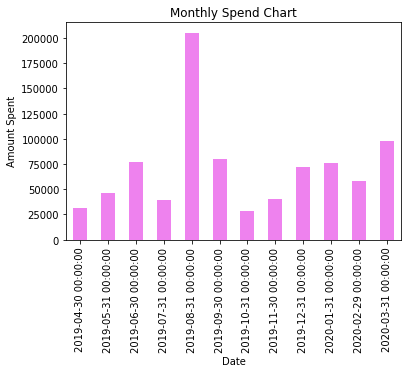

In [30]:
plt.plot(figsize=(20,20))
plt.title('Monthly Spend Chart')
plt.xlabel('Months')
plt.ylabel('Amount Spent')
df['withdrawal'].resample('M').sum().plot(kind='bar',color='violet')
plt.show()

### Monthly credit analysis

In [31]:
df['deposit'].resample('M').sum()

Date
2019-04-30     37664.29
2019-05-31     32832.00
2019-06-30     84036.56
2019-07-31     45378.00
2019-08-31    191100.30
2019-09-30     85549.00
2019-10-31     37069.00
2019-11-30     39301.00
2019-12-31     76031.22
2020-01-31     74733.70
2020-02-29     58520.50
2020-03-31    101831.02
Freq: M, Name: deposit, dtype: float64

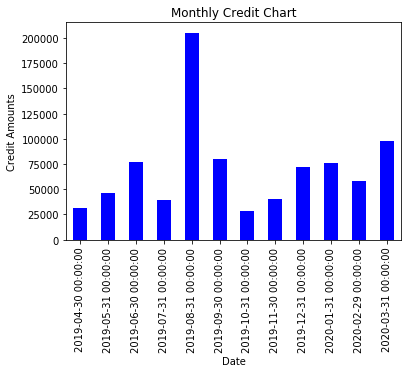

In [32]:
plt.plot(figsize=(20,20))
plt.title('Monthly Credit Chart')
plt.xlabel('Months')
plt.ylabel('Credit Amounts')
df['withdrawal'].resample('M').sum().plot(kind='bar',color='blue')
plt.show()

### Checking data for timeseries forecast

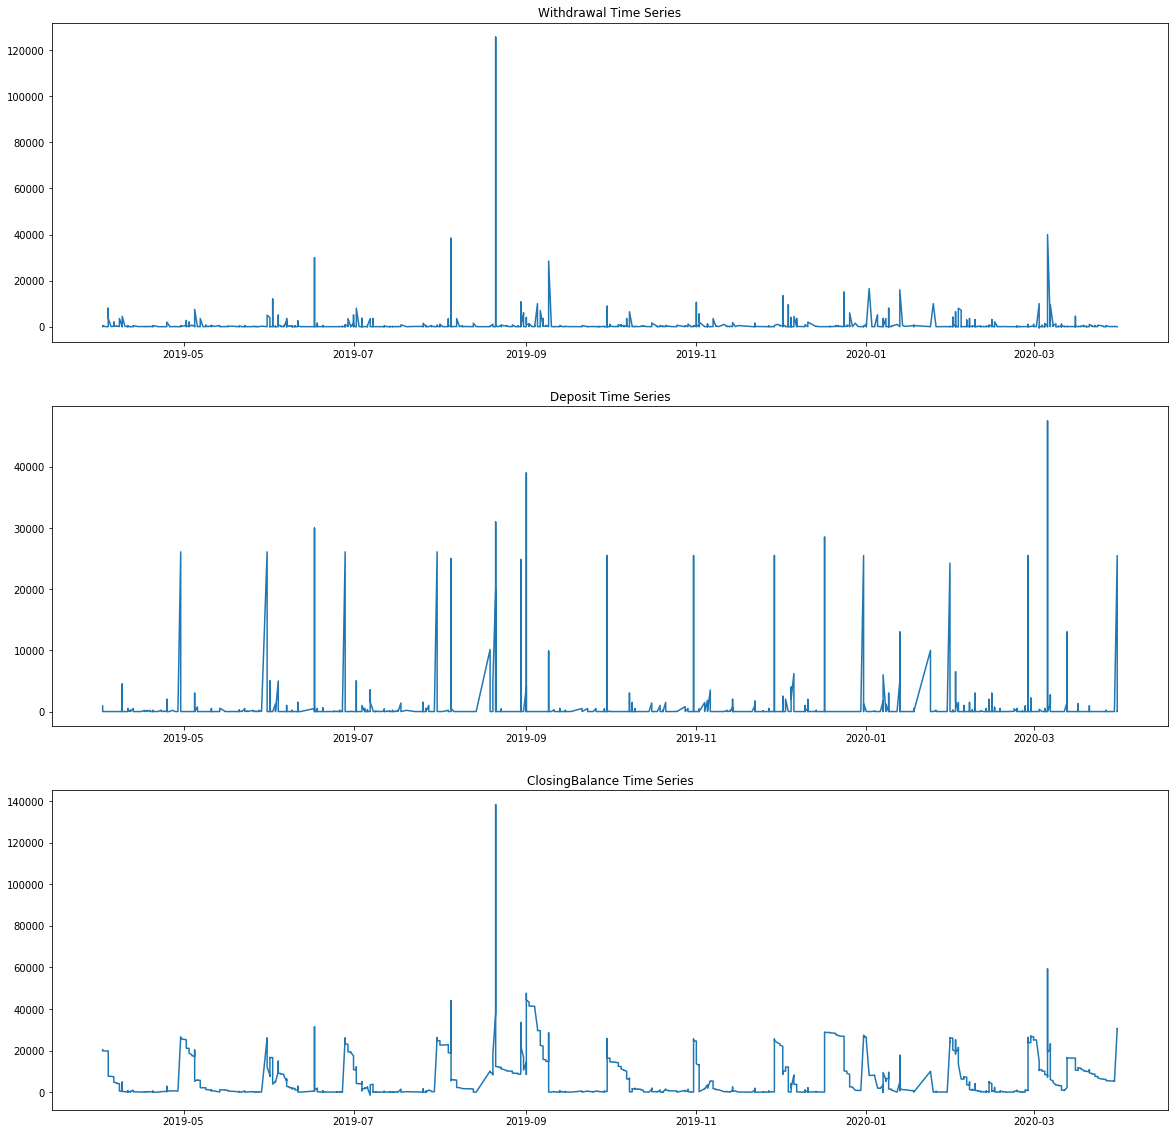

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.title('Withdrawal Time Series')
plt.plot(df[['withdrawal']])
plt.subplot(3,1,2)
plt.title('Deposit Time Series')
plt.plot(df[['deposit']])
plt.subplot(3,1,3)
plt.title('ClosingBalance Time Series')
plt.plot(df[['closingbalance']])
plt.show()

### Checking total monthly debit transaction 

In [34]:
df['withdrawal'].resample('M').count()

Date
2019-04-30     80
2019-05-31     77
2019-06-30    118
2019-07-31    101
2019-08-31     89
2019-09-30    109
2019-10-31     98
2019-11-30     77
2019-12-31     87
2020-01-31     71
2020-02-29    174
2020-03-31    155
Freq: M, Name: withdrawal, dtype: int64

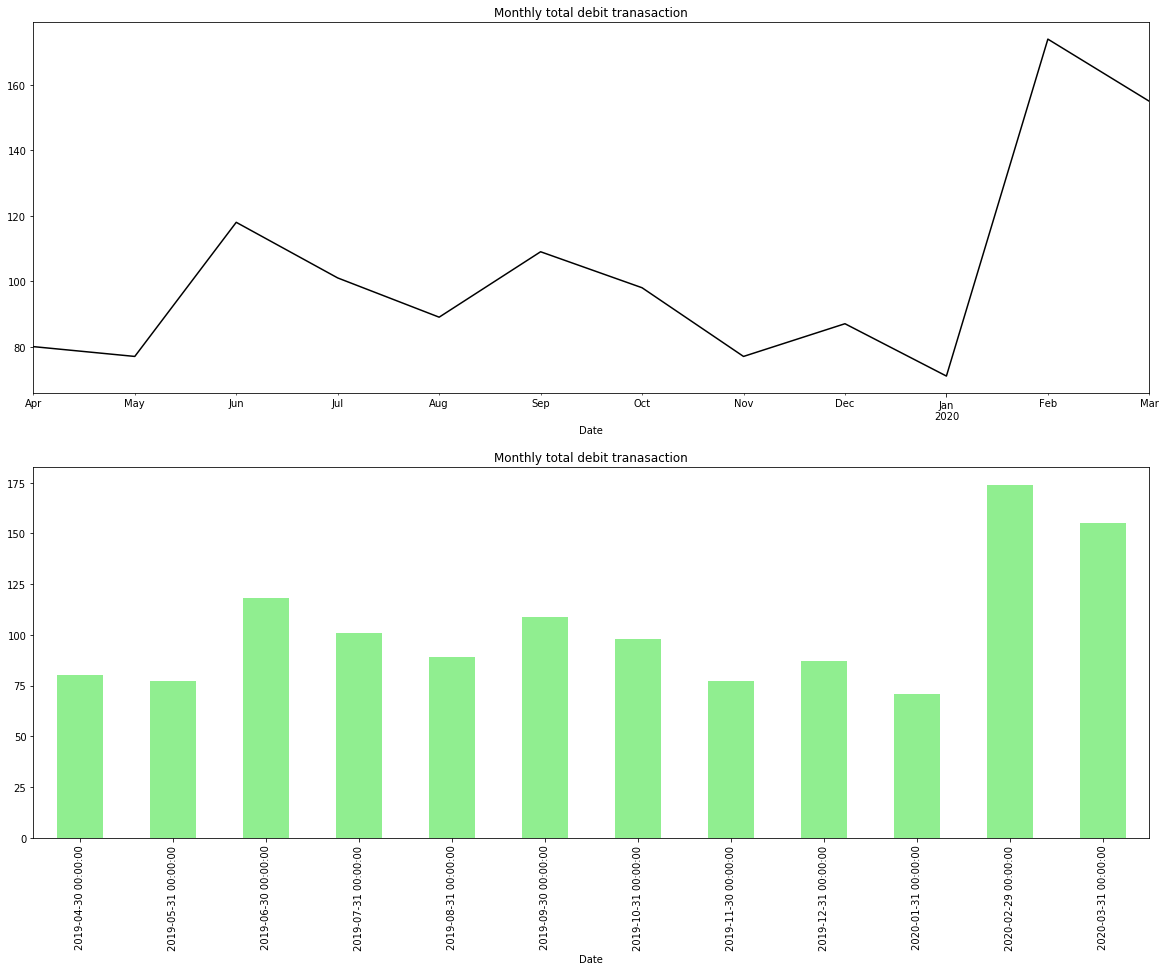

In [35]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.title('Monthly total debit tranasaction')
df['withdrawal'].resample('M').count().plot(color='black')
plt.subplot(2,1,2)
plt.title('Monthly total debit tranasaction')
df['withdrawal'].resample('M').count().plot(kind='bar',color='lightgreen')

### Checking the total difference for credit and debit transaction

In [36]:
debit_count=df['withdrawal'].resample('M').count()
credit_count=df['deposit'].resample('M').count()
total_diff_transaction=(debit_count-credit_count) 
print(total_diff_transaction)

Date
2019-04-30    0
2019-05-31    0
2019-06-30    0
2019-07-31    0
2019-08-31    0
2019-09-30    0
2019-10-31    0
2019-11-30    0
2019-12-31    0
2020-01-31    0
2020-02-29    0
2020-03-31    0
Freq: M, dtype: int64


### Extracting insights using Pivot Transformation

In [37]:
df.reset_index(inplace=True)
df.set_index('Date',inplace=True)
df_pivot=df.resample('D').sum()
dates=pd.date_range(start='2019-04-02',periods=len(df_pivot),freq='D')
df_pivot['month']=dates.month
df_pivot['month']=df_pivot['month'].apply(lambda x:calendar.month_abbr[x])
df_pivot['year']=dates.year
df_pivot.reset_index(inplace=True)

In [38]:
df_pivot['year']=df_pivot['year'].astype('str')
df_pivot['month']=df_pivot['month'].astype('str')
df_pivot['month-year']=df_pivot['month']+'-'+df_pivot['year']

### Total Sum

In [39]:
df_pivot.pivot_table(values=['withdrawal','deposit'],columns='year',index='month',aggfunc=sum).fillna(0).T

month                 Apr        Aug       Dec      Feb       Jan      Jul  \
           year                                                              
deposit    2019  37664.29  191100.30  76031.22      0.0      0.00  45378.0   
           2020      0.00       0.00      0.00  58520.5  74733.70      0.0   
withdrawal 2019  31437.00  205279.45  72469.13      0.0      0.00  39728.0   
           2020      0.00       0.00      0.00  57751.1  76115.78      0.0   

month                 Jun        Mar      May      Nov      Oct       Sep  
           year                                                            
deposit    2019  84036.56       0.00  32832.0  39301.0  37069.0  85549.00  
           2020      0.00  101831.02      0.0      0.0      0.0      0.00  
withdrawal 2019  76947.00       0.00  46495.0  40121.0  28710.0  79847.04  
           2020      0.00   97920.18      0.0      0.0      0.0      0.00

### Total Average

In [40]:
df_pivot.pivot_table(values=['withdrawal','deposit'],columns='year',index='month',aggfunc='mean').fillna(0).T

month                    Apr          Aug          Dec          Feb  \
           year                                                       
deposit    2019  1298.768621  6164.525806  2452.620000     0.000000   
           2020     0.000000     0.000000     0.000000  2017.948276   
withdrawal 2019  1084.034483  6621.917742  2337.713871     0.000000   
           2020     0.000000     0.000000     0.000000  1991.417241   

month                    Jan          Jul          Jun          Mar  \
           year                                                       
deposit    2019     0.000000  1463.806452  2801.218667     0.000000   
           2020  2410.764516     0.000000     0.000000  3284.871613   
withdrawal 2019     0.000000  1281.548387  2564.900000     0.000000   
           2020  2455.347742     0.000000     0.000000  3158.715484   

month                    May          Nov          Oct          Sep  
           year                                                      
deposit    2019  1059.096774  1310.033333  1195.774194  2851.633333  
           2020     0.000000     0.000000     0.000000     0.000000  
withdrawal 2019  1499.838710  1337.366667   926.129032  2661.568000  
           2020     0.000000     0.000000     0.000000     0.000000

In [41]:
df_grouped = df.groupby([df.index.year,df.index.month,df.index.day],as_index=True).sum()
df_grouped

withdrawal   deposit  closingbalance
Date Date Date                                      
2019 4    2          551.0    900.00        80838.12
          3            0.0      0.75        19818.78
          4        12187.0      0.00        58048.12
          5           36.0      0.00         7595.78
          6         2820.0      0.00        22463.12
...                    ...       ...             ...
2020 3    27         905.0    200.00        29595.70
          28          68.0      0.00         5444.74
          29          53.0      0.00        10806.48
          30         171.0      0.00        10521.48
          31          32.0  25506.20        92110.42

[309 rows x 3 columns]

### Decomposing the monthly spent analysis

<Figure size 72000x72000 with 0 Axes>

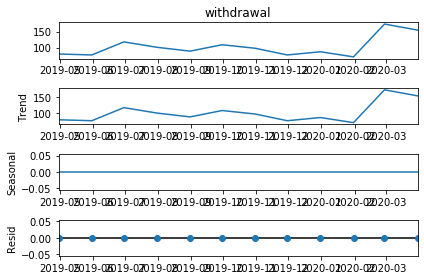

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(1000,1000))
transaction=df['withdrawal'].resample('M').count()
d=seasonal_decompose(transaction,period=1)
d.plot()
plt.show()

Since minimum duration of fluctuation to decompose is 2 years.But we have only one year data.So, we are considering the period to 1 cycle.

### Trend values in the cycle

In [43]:
d.trend

Date
2019-04-30     80.0
2019-05-31     77.0
2019-06-30    118.0
2019-07-31    101.0
2019-08-31     89.0
2019-09-30    109.0
2019-10-31     98.0
2019-11-30     77.0
2019-12-31     87.0
2020-01-31     71.0
2020-02-29    174.0
2020-03-31    155.0
Freq: M, Name: trend, dtype: float64

### Seasonal values in cycle

In [44]:
d.seasonal

Date
2019-04-30    0.0
2019-05-31    0.0
2019-06-30    0.0
2019-07-31    0.0
2019-08-31    0.0
2019-09-30    0.0
2019-10-31    0.0
2019-11-30    0.0
2019-12-31    0.0
2020-01-31    0.0
2020-02-29    0.0
2020-03-31    0.0
Freq: M, Name: seasonal, dtype: float64

Hence there will be no seasonal values because no flucatuations between period

### Residuals in cylce

In [45]:
d.resid

Date
2019-04-30    0.0
2019-05-31    0.0
2019-06-30    0.0
2019-07-31    0.0
2019-08-31    0.0
2019-09-30    0.0
2019-10-31    0.0
2019-11-30    0.0
2019-12-31    0.0
2020-01-31    0.0
2020-02-29    0.0
2020-03-31    0.0
Freq: M, Name: resid, dtype: float64

Hence no seasonal there is no fluctuations and Hence if no fluctuations there is no residuals.

## Summary

- This dataset does not follow Time Series Sequences.
- Forecasting is not possible.Hence Exploratory Data Analysis is done deeply.
- June and August month has comparitively more spent than other months
- Trend has been captured.